In [1]:
import torch
import torch.nn as nn

In [17]:
in_dim=28
encoded_dim=10
import torch.nn.functional as F
class autoencoder(nn.Module):
    def __init__(self,in_dim,encoded_dim):
        super(autoencoder, self).__init__()
        self.fc1 = nn.Linear(in_dim, in_dim-2)
        self.fc2 = nn.Linear(in_dim-2, in_dim-4)
        self.fc3 = nn.Linear(in_dim-4, in_dim-6)
        self.fc4 = nn.Linear(in_dim-6, encoded_dim)
        self.fc5=nn.Linear(encoded_dim,encoded_dim+10)
        self.fc6=nn.Linear(encoded_dim+10,in_dim)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x=self.fc4(x)
        x=F.relu(self.fc5(x))
        x=self.fc6(x)
        return x
net=autoencoder(in_dim,encoded_dim)   

In [18]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.0005, momentum=0.9)

In [19]:
import torchvision
import torchvision.transforms as transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1,
                                          shuffle=True, num_workers=1)
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1,
                                         shuffle=False, num_workers=1)


In [20]:
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        
        x,y=data
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        xprime = net(x)
        loss = criterion(xprime, x)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 0.556
[1,  4000] loss: 0.315
[1,  6000] loss: 0.295
[1,  8000] loss: 0.267
[1, 10000] loss: 0.248
[1, 12000] loss: 0.226
[1, 14000] loss: 0.215
[1, 16000] loss: 0.203
[1, 18000] loss: 0.195
[1, 20000] loss: 0.184
[1, 22000] loss: 0.169
[1, 24000] loss: 0.165
[1, 26000] loss: 0.160
[1, 28000] loss: 0.159
[1, 30000] loss: 0.157
[1, 32000] loss: 0.156
[1, 34000] loss: 0.156
[1, 36000] loss: 0.155
[1, 38000] loss: 0.156
[1, 40000] loss: 0.153
[1, 42000] loss: 0.150
[1, 44000] loss: 0.145
[1, 46000] loss: 0.127
[1, 48000] loss: 0.112
[1, 50000] loss: 0.105
[1, 52000] loss: 0.103
[1, 54000] loss: 0.098
[1, 56000] loss: 0.096
[1, 58000] loss: 0.092
[1, 60000] loss: 0.090
[2,  2000] loss: 0.086
[2,  4000] loss: 0.084
[2,  6000] loss: 0.086
[2,  8000] loss: 0.084
[2, 10000] loss: 0.083
[2, 12000] loss: 0.083
[2, 14000] loss: 0.082
[2, 16000] loss: 0.082
[2, 18000] loss: 0.081
[2, 20000] loss: 0.081
[2, 22000] loss: 0.080
[2, 24000] loss: 0.081
[2, 26000] loss: 0.081
[2, 28000] 

[12, 48000] loss: 0.020
[12, 50000] loss: 0.019
[12, 52000] loss: 0.020
[12, 54000] loss: 0.020
[12, 56000] loss: 0.020
[12, 58000] loss: 0.019
[12, 60000] loss: 0.019
[13,  2000] loss: 0.020
[13,  4000] loss: 0.019
[13,  6000] loss: 0.019
[13,  8000] loss: 0.019
[13, 10000] loss: 0.020
[13, 12000] loss: 0.019
[13, 14000] loss: 0.019
[13, 16000] loss: 0.019
[13, 18000] loss: 0.019
[13, 20000] loss: 0.019
[13, 22000] loss: 0.020
[13, 24000] loss: 0.019
[13, 26000] loss: 0.019
[13, 28000] loss: 0.019
[13, 30000] loss: 0.020
[13, 32000] loss: 0.019
[13, 34000] loss: 0.020
[13, 36000] loss: 0.019
[13, 38000] loss: 0.019
[13, 40000] loss: 0.019
[13, 42000] loss: 0.019
[13, 44000] loss: 0.019
[13, 46000] loss: 0.020
[13, 48000] loss: 0.019
[13, 50000] loss: 0.019
[13, 52000] loss: 0.019
[13, 54000] loss: 0.019
[13, 56000] loss: 0.019
[13, 58000] loss: 0.019
[13, 60000] loss: 0.019
[14,  2000] loss: 0.019
[14,  4000] loss: 0.019
[14,  6000] loss: 0.018
[14,  8000] loss: 0.018
[14, 10000] loss

tensor(5.0643, grad_fn=<SumBackward0>)


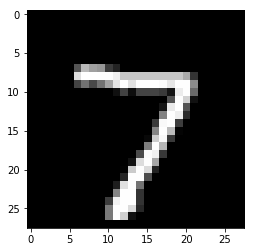

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(testloader)
image, label = dataiter.next()
print(criterion(image,net(image)))

# show images
imshow(torchvision.utils.make_grid(image))
#imshow(torchvision.utils.make_grid(net(image).detach()))
plt.show()

In [25]:
!pip3 install matplotlib


    100% |████████████████████████████████| 14.1MB 34kB/s eta 0:00:011   18% |██████                          | 2.7MB 5.2MB/s eta 0:00:03
    100% |████████████████████████████████| 61kB 1.4MB/s ta 0:00:01
    100% |████████████████████████████████| 112kB 2.0MB/s ta 0:00:01
You are using pip version 9.0.3, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
